In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os
from linear_regression import LinearRegression
from gradient_descent import GradientDescent, quad, quadGrad
%matplotlib inline

--Ridge Regression Statistics--
w_ridge = [ 1.41110495  0.3547736 ]
SSE_train = 14.6572814207
SSE_validate = 13.9529873179
SSE_test = 17.6287593958


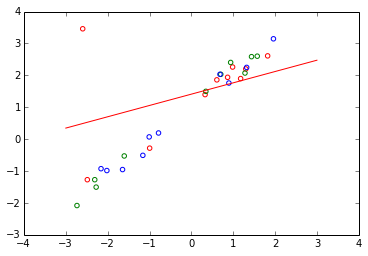

 
-------------
M = 0
argmin lambda = 10.0
SSE_train = 23.8531121405
SSE_val = 21.9236360118
SSE_test = 32.3215991805
----------------
 
 
-------------
M = 1
argmin lambda = 6.53266331658
SSE_train = 18.3617212364
SSE_val = 11.4438516334
SSE_test = 16.8939598372
----------------
 
 
-------------
M = 2
argmin lambda = 1.80904522613
SSE_train = 12.4138336947
SSE_val = 8.91996688239
SSE_test = 24.1285791444
----------------
 
 
-------------
M = 3
argmin lambda = 0.100502512563
SSE_train = 9.83773289738
SSE_val = 3.60078310093
SSE_test = 23.5464243116
----------------
 
 
-------------
M = 4
argmin lambda = 0.854271356784
SSE_train = 8.70102995515
SSE_val = 0.987786480892
SSE_test = 27.4763457011
----------------
 
 
-------------
M = 5
argmin lambda = 8.94472361809
SSE_train = 10.379397931
SSE_val = 2.19305884364
SSE_test = 36.47314725
----------------
 


In [2]:

def plot(lr,w, plot_sin=True, plot_test=False, plot_validate=False):
    # plot sin(2*phi*x) in green
    x_min = np.amin(lr.x)
    x_max = np.amax(lr.x)
    x = np.linspace(-3,3,1000)
    M = lr.numFeatures - 1
    sin_x = np.sin(2*np.pi*x)
    lr_temp = LinearRegression(x,x,lr.numFeatures-1)
    reg_prediction = np.dot(lr_temp.phi,w)
    
    lr_validate = LinearRegression.fromFile(validate_filename, M)
    lr_test = LinearRegression.fromFile(test_filename, M)
    
    
    if plot_sin:
        plt.plot(x,sin_x, color='g')
        
    plt.plot(x, reg_prediction, color='r')
    
    # the training set is plotted in blue
    plt.scatter(lr.x, lr.y, color='r', marker='o',facecolors='none')
    
    # test set plotted in green
    if plot_test:
        plt.scatter(lr_test.x, lr_test.y, color='g', marker='o',facecolors='none')
        
    # validation set plotted in orange
    if plot_test:
        plt.scatter(lr_validate.x, lr_validate.y, color='b', marker='o',facecolors='none')
        
        
    plt.show()
    
def plotRidge(M,lam):
    lr = LinearRegression.fromFile(filename, M)
    w_ridge = lr.ridge(lam)
    sse = lr.SSE(w_ridge)
    plot(lr,w_ridge)
    print " "
    print "--Ridge Regression Statistics--"
    print "w_ridge = " + str(w_ridge)
    print "SSE = " + str(sse) 
    

def computeRidge(M, lam, train, test, validate, verbose=True):
    lr_train = LinearRegression.fromFile(train, M)
    lr_validate = LinearRegression.fromFile(validate, M)
    lr_test = LinearRegression.fromFile(test, M)
    
    w_ridge = lr_train.ridge(lam)
    sse_train = lr_train.SSE(w_ridge)
    sse_test = lr_test.SSE(w_ridge)
    sse_validate = lr_validate.SSE(w_ridge)
    
    if verbose:
        print "--Ridge Regression Statistics--"
        print "w_ridge = " + str(w_ridge)
        print "SSE_train = " + str(sse_train)
        print "SSE_validate = " + str(sse_validate)
        print "SSE_test = " + str(sse_test)

        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
    
    return (sse_validate, sse_test, sse_train)

def modelSelection(M, showPlot=False):
    sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
    sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]
    sseTrain = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[2]
    
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
    
    lam_vec = np.linspace(0,10,200)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    lr_train = lr_train = LinearRegression.fromFile(train_filename, M)
    w_ridge = lr_train.ridge(lam_min)
    

    if showPlot:
#         plt.plot(lam_vec, a, color='b')
#         plt.plot(lam_vec, b, color='g')
        plot(lr_train, w_ridge, plot_sin=False, plot_test=True, plot_validate=True)
        plt.show()
        
    print " "
    print "-------------"
    print "M = " + str(M)
    print "argmin lambda = " + str(lam_min)
    print "SSE_train = " + str(c[lam_min_idx])
    print "SSE_val = " + str(a[lam_min_idx])
    print "SSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " "
    
    


    
filename = "curvefitting.txt"
test_filename = "regress_test.txt"
train_filename = "regress_train.txt"
validate_filename = "regress_validate.txt"
M = 1
lam =1.14
# plotRidge(M, lam)
computeRidge(M, lam, train_filename, test_filename, validate_filename, verbose=True)

# sseVal = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[0]
# sseTest = lambda x: computeRidge(M, x, train_filename, test_filename, validate_filename, verbose=False)[1]

# sseVal_vec = np.vectorize(sseVal)
# sseTest_vec = np.vectorize(sseTest)

# lam_vec = np.linspace(0,10,100)
# a = sseVal_vec(lam_vec)
# b = sseTest_vec(lam_vec)

# plt.plot(lam_vec, a, color='b')
# plt.plot(lam_vec, b, color='g')

for m in range(0,6):
    modelSelection(m, showPlot=False)
    

  

sseVal_vec(np.array([1,2]))

### Blog Feedback

In [3]:
lr_train = LinearRegression.fromBlog(type='train')
lr_validate = LinearRegression.fromBlog(type='val')
lr_test = LinearRegression.fromBlog(type='test')

lr_train_norm = LinearRegression.fromBlog(type='train', rescaleFeatures=True)
lr_validate_norm = LinearRegression.fromBlog(type='val', rescaleFeatures=True)
lr_test_norm = LinearRegression.fromBlog(type='test', rescaleFeatures=True)

In [33]:
def scatterPredictionPlot(w):
    print 0
    


def computeBlogRidge(lam, verbose=True, rescaleFeatures=False):
    
    print "evaluating for a specific lambda"
    
    if rescaleFeatures:
        w_ridge = lr_train_norm.ridge(lam)
        mse_train = lr_train_norm.MSE(w_ridge)
        mse_test = lr_test_norm.MSE(w_ridge)
        mse_validate = lr_validate_norm.MSE(w_ridge)
    else:
        w_ridge = lr_train.ridge(lam)
        mse_train = lr_train.MSE(w_ridge)
        mse_test = lr_test.MSE(w_ridge)
        mse_validate = lr_validate.MSE(w_ridge)
    
    if verbose:
        print " "
        print "--Ridge Regression Statistics--"
        print "lambda = " + str(lam)
        print "rescaled features = " + str(rescaleFeatures)
#         print "w_ridge = " + str(w_ridge)
        print "MSE_train = " + str(mse_train)
        print "MSE_validate = " + str(mse_validate)
        print "MSE_test = " + str(mse_test)
        print " "
        
        grid = np.linspace(1,np.size(w_ridge),np.size(w_ridge))
        plt.scatter(grid,w_ridge)
        plt.show()
    
    return (mse_validate, mse_test, mse_train)

def blogModelSelection(showPlot=True, rescaleFeatures=False):
    sseVal = lambda x: computeBlogRidge(x, verbose=False, rescaleFeatures=rescaleFeatures)[0]
    sseTest = lambda x: computeBlogRidge(x, verbose=False, rescaleFeatures=rescaleFeatures)[1]
    sseTrain = lambda x: computeBlogRidge(x, verbose=False, rescaleFeatures=rescaleFeatures)[2]
    
#     sseFunc = lambda x: computeBlogRidge(x, verbose=False, rescaleFeatures=rescaleFeatures)
    
    num_obs = 1.0*np.shape(lr_train.phi)[0]
    N = lr_train.N
    sseVal_vec = np.vectorize(sseVal)
    sseTest_vec = np.vectorize(sseTest)
    sseTrain_vec = np.vectorize(sseTrain)
#     sseFunc_vec = np.vectorize(sseFunc)
    
    lam_vec = np.linspace(100,500,10)
    a = sseVal_vec(lam_vec)
    b = sseTest_vec(lam_vec)
    c = sseTrain_vec(lam_vec)

#     sse_vals = sseFunc_vec(lam_vec)
#     return sse_vals
#     a = sse_vals[:,0]
#     b = sse_vals[:,1]
#     c = sse_vals[:,2]
    
    lam_min_idx = np.argmin(a)
    lam_min = lam_vec[lam_min_idx]
    
    w = lr_train.ridge(lam_min)
    
    
    

    if showPlot:
        plt.plot(lam_vec, c, color='r')
        plt.show()
        
        plt.plot(lam_vec, a, color='b')
        plt.show()
#         plt.plot(lam_vec/num_obs, a, color='b')
        plt.plot(lam_vec, b, color='g')
        plt.show()
        
    print " "
    print "-------------"
    print "rescaled features = " + str(rescaleFeatures)
    print "argmin lambda = " + str(lam_min)
    print "argmin lambda/num_obs = " + str(lam_min/(num_obs))
    print "MSE_train = " + str(c[lam_min_idx])
    print "MSE_val = " + str(a[lam_min_idx])
    print "MSE_test = " + str(b[lam_min_idx])
    print "----------------"
    print " " 
    

# lr_train = LinearRegression.fromBlog(type='train')
# blogModelSelection()
N = lr_train.N
lam = 25
# computeBlogRidge(lam)
# computeBlogRidge(lam, rescaleFeatures=True)


# sse_vals = blogModelSelection(rescaleFeatures=True)
# computeBlogRidge(0.002)
# computeBlogRidge(1e6)
# computeBlogRidge(0.0005)
# computeBlogRidge(0.00001)

evaluating for a specific lambda
 
--Ridge Regression Statistics--
lambda = 200
rescaled features = True
MSE_train = 946.904622966
MSE_validate = 1116.9081787
MSE_test = 968.452584042
 


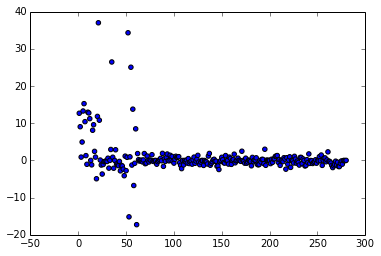

evaluating for a specific lambda
 
--Ridge Regression Statistics--
lambda = 400
rescaled features = True
MSE_train = 971.289455208
MSE_validate = 1111.6396688
MSE_test = 999.536437197
 


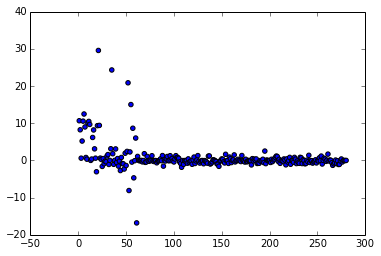

evaluating for a specific lambda
 
--Ridge Regression Statistics--
lambda = 350
rescaled features = True
MSE_train = 966.240358108
MSE_validate = 1111.20533993
MSE_test = 993.111046013
 


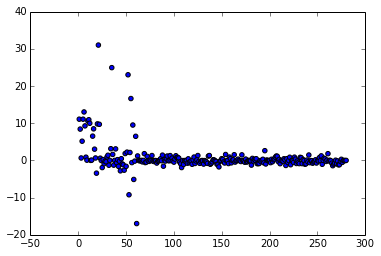

(1111.2053399276426, 993.11104601268812, 966.24035810814962)

In [34]:
lam = 200
rescale = True

computeBlogRidge(200, verbose=True, rescaleFeatures=rescale)
computeBlogRidge(400, verbose=True, rescaleFeatures=rescale)
computeBlogRidge(350, verbose=True, rescaleFeatures=rescale)


# computeBlogRidge(3000, verbose=True, rescaleFeatures=False)



In [32]:
print np.mean(lr_validate.y)
print np.mean(lr_test.y)
columnMax = np.max(lr_train.phi, axis=0)
idx = np.where(columnMax < 0.001)
print idx

print lr_train.phi[100,12]

6.82404580153
6.74169847328
(array([ 12,  22,  32,  37,  47, 277]),)
0.0


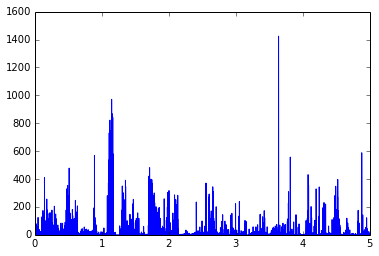

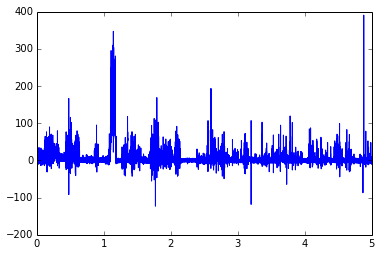

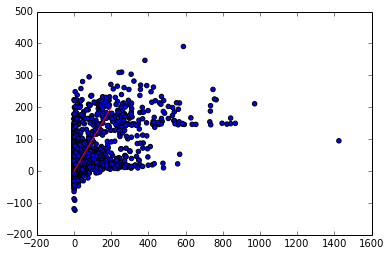

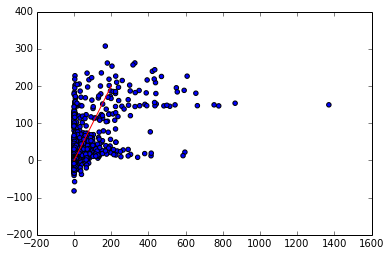

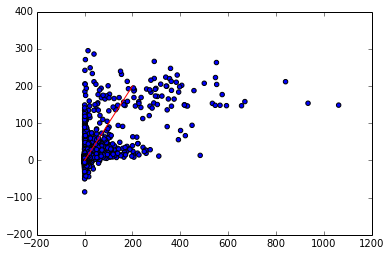

In [7]:
N_val = lr_validate.N
N_test = lr_test.N
grid = np.linspace(0,5,N)
grid_val = np.linspace
plt.plot(grid, lr_train.y)
plt.show()

lam = N*0.1
w = lr_train.ridge(lam)
y_predicted = np.dot(lr_train.phi, w)
y_pred_val = np.dot(lr_validate.phi,w)
y_pred_test = np.dot(lr_test.phi, w)
plt.plot(grid, y_predicted)
plt.show()

line_pts = np.linspace(0,200,200)
plt.plot(line_pts, line_pts, color='r')
plt.scatter(lr_train.y,y_predicted)
plt.show()

line_pts = np.linspace(0,200,200)
plt.plot(line_pts, line_pts, color='r')
plt.scatter(lr_validate.y, y_pred_val)
plt.show()


line_pts = np.linspace(0,200,200)
plt.plot(line_pts, line_pts, color='r')
plt.scatter(lr_test.y, y_pred_test)
plt.show()

In [8]:
a = np.array([[1,2],[3,4]])
print a
np.min(a, axis=0)

[[1 2]
 [3 4]]


array([1, 2])

In [9]:
np.sqrt(890)

29.832867780352597

In [10]:
a = np.array([[1,2],[1,2]])
print a
b = np.linalg.norm(a,ord=2,axis=0)
print b
print a/b[None,:]

c = np.array([1,3])
print a - c[None,:]

[[1 2]
 [1 2]]
[ 1.41421356  2.82842712]
[[ 0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[[ 0 -1]
 [ 0 -1]]


In [11]:
a = (1,2,3)
b = np.array(a)
print b

[1 2 3]
